# Exploratory Data Analysis

This notebook is to perform exploratory data analysis (EDA) on the merged dataset which involves EPA Air Quality System (AQS) and CDC Places datasets. The goal is to understand the underlying patterns and relationships in the data, identify any anomalies or outliers, and gather insights on how diabetes and hypertension prevalence relate to air quality indicators and other control factors.

## 1. Import Libraries and Load Data

Import necessary libraries and load the merged dataset for analysis.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_theme(style="whitegrid", context="notebook")

In [2]:
df = pd.read_csv('aqi_places_merged.csv')

## 2. Dataset Overview

The datasets consist of county-level data from the United States, combining air quality measurements from the EPA AQS with health outcome data from the CDC Places dataset. 

EPA AQS Dataset contains air quality measurements such as PM2.5, PM10, Ozone, AQI levels. In order to focus on relevant air quality indicators, we selected key PM2.5 variable to understand air pollution effects on health outcomes.

CDC Places Dataset includes health outcome variables such as the prevalence of diabetes and hypertension, along with various demographic and lifestyle control variables (e.g., lack of health insurance, binge drinking, routine checkup, smoking etc.). In this analysis, we specifically focused on diabetes and hypertension prevalence as the primary health outcomes of interest and took into account several control variables to adjust for potential confounding factors to show the relationship between air quality and health outcomes more accurately.

The merging of these two datasets was performed based on the common county names to ensure accurate alignment of air quality data with corresponding health outcome data for each county.

The merged dataset contains the following key variables:
- **Air Quality Indicators**: PM2.5 levels.
- **Health Outcomes**: Prevalence of diabetes, prevalence of hypertension.
- **Control Variables**: Demographic factors (lack of health insurance, binge drinking, routine checkup, smoking, no leisure time physical activity, obesity, frequent physical distress)


In this part of the notebook, we will inspect some samples from dataset, show dataset structure, check for missing values, and describe the the data using summary statistics.

In [3]:
df.head()

,state,county,pm25_days,hypertension,diabetes,lack_of_health_insurance,binge_drinking,routine_checkup,smoking,no_leisure_time_physical_activity,obesity,frequent_physical_distress
0,alabama,baldwin,228,32.4,10.2,9.6,18.2,76.8,14.7,23.8,36.8,12.1
1,alabama,clay,354,38.4,13.1,11.1,15.8,76.4,21.5,32.1,39.6,16.0
2,alabama,dekalb,124,37.2,13.8,15.3,15.2,75.7,22.5,34.1,38.9,17.6
3,alabama,elmore,0,35.9,11.4,9.3,16.6,78.5,15.8,25.6,36.4,12.7
4,alabama,etowah,278,36.8,12.6,12.2,15.8,77.3,18.8,29.9,41.3,14.9


In [8]:
print("Shape (rows, columns):", df.shape)
df.info()

Shape (rows, columns): (921, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 921 entries, 0 to 920
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   state                              921 non-null    object 
 1   county                             921 non-null    object 
 2   pm25_days                          921 non-null    int64  
 3   hypertension                       921 non-null    float64
 4   diabetes                           921 non-null    float64
 5   lack_of_health_insurance           921 non-null    float64
 6   binge_drinking                     921 non-null    float64
 7   routine_checkup                    921 non-null    float64
 8   smoking                            921 non-null    float64
 9   no_leisure_time_physical_activity  921 non-null    float64
 10  obesity                            921 non-null    float64
 11  frequent_physical_distres

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pm25_days,921.0,147.791531,121.658717,0.0,10.0,144.0,232.0,366.0
hypertension,921.0,30.925624,4.185650,20.9,28.0,30.4,33.3,47.6
diabetes,921.0,10.437459,2.064640,6.0,9.0,10.1,11.7,19.9
lack_of_health_insurance,921.0,10.495114,4.858118,2.5,7.4,9.3,12.3,48.4
binge_drinking,921.0,18.952877,2.657752,9.4,17.2,19.0,20.6,26.4
routine_checkup,921.0,73.392834,4.140250,63.6,69.9,74.3,76.6,83.1
smoking,921.0,16.145820,3.636211,5.9,13.6,16.3,18.5,30.4
no_leisure_time_physical_activity,921.0,24.107926,4.838284,11.8,20.7,23.8,27.3,42.1
obesity,921.0,35.787188,5.153016,17.7,32.7,36.3,39.4,48.5
frequent_physical_distress,921.0,12.891748,2.078601,7.7,11.5,12.8,14.2,21.9


In [9]:
df.isnull().sum()

state                                0
county                               0
pm25_days                            0
hypertension                         0
diabetes                             0
lack_of_health_insurance             0
binge_drinking                       0
routine_checkup                      0
smoking                              0
no_leisure_time_physical_activity    0
obesity                              0
frequent_physical_distress           0
dtype: int64

In [32]:
variables_of_interest = df.columns.tolist()
variables_of_interest.remove('state')
variables_of_interest.remove('county')
variables_of_interest

['pm25_days',
 'hypertension',
 'diabetes',
 'lack_of_health_insurance',
 'binge_drinking',
 'routine_checkup',
 'smoking',
 'no_leisure_time_physical_activity',
 'obesity',
 'frequent_physical_distress']

## 3. Univariate Analysis

This section inspects the marginal distributions of the main variables to understand their ranges, central tendencies, and dispersion before any pairwise or multivariable analysis.

We focus on the following groups of variables:
- **Air quality**: PM2.5 exposure (`pm25_days`) to assess its overall distribution and any extreme values.
- **Health outcomes**: Diabetes and hypertension prevalence to check their spread, and skewness.
- **Control and behavioral factors**: Variables such as obesity, smoking, lack of health insurance, physical inactivity, and others that may act as confounders or covariates in later models.

For each variable we will: examine histograms and boxplots, and note skewness or outliers that may require transformation or special handling in modelling.


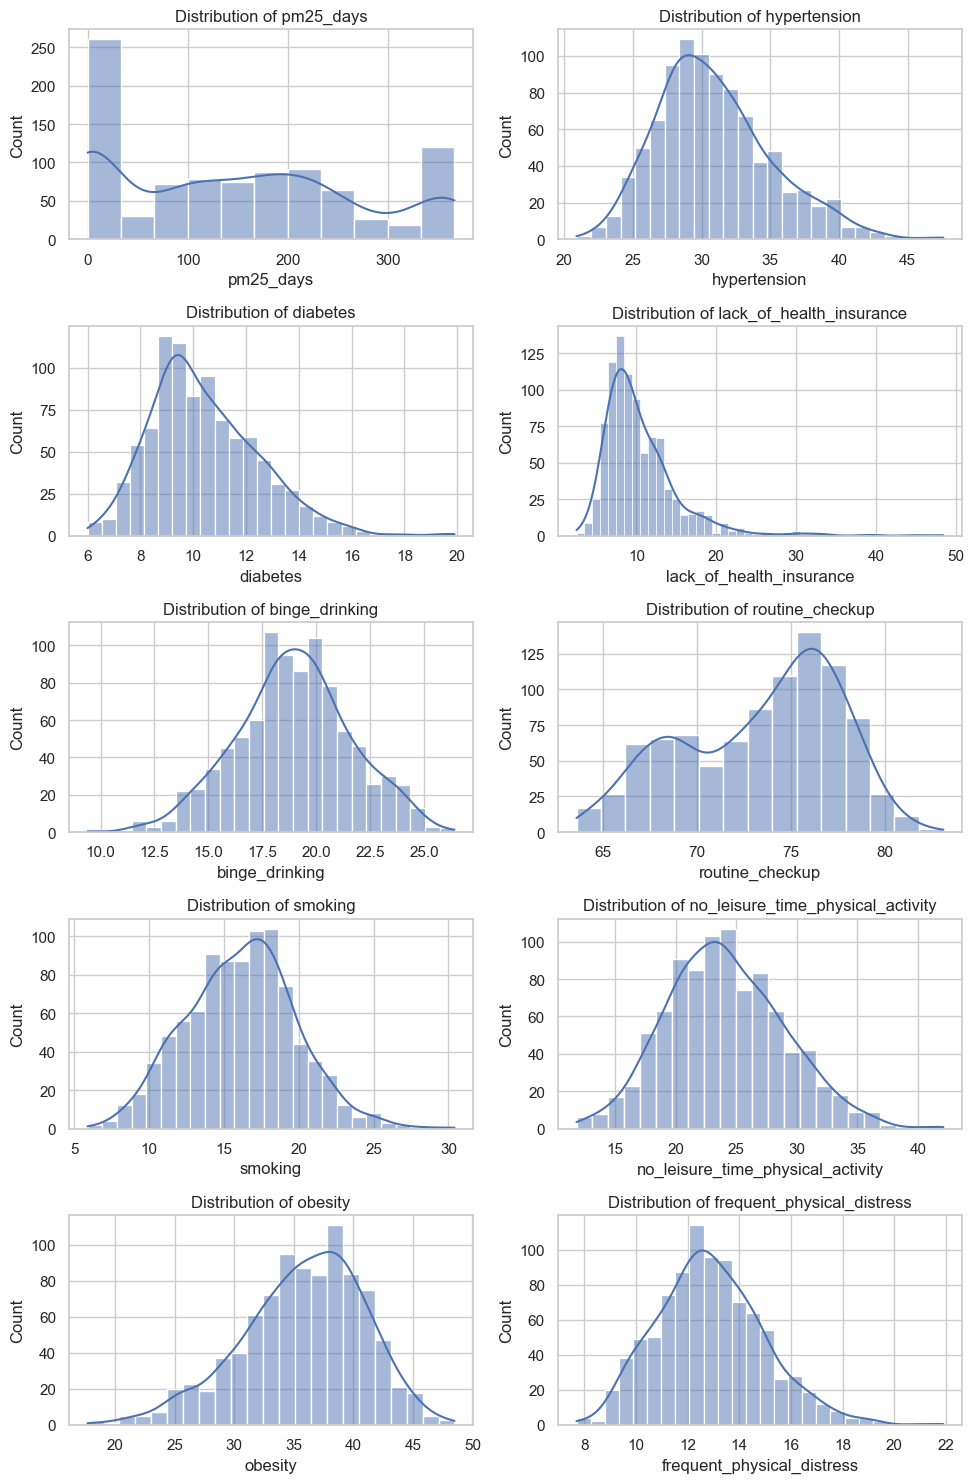

In [33]:
fig, axes = plt.subplots(5, 2, figsize=(10, 15))
for col in variables_of_interest:
    if col not in df.columns:
        continue
        
    ax = axes.flatten()[variables_of_interest.index(col)]
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()  


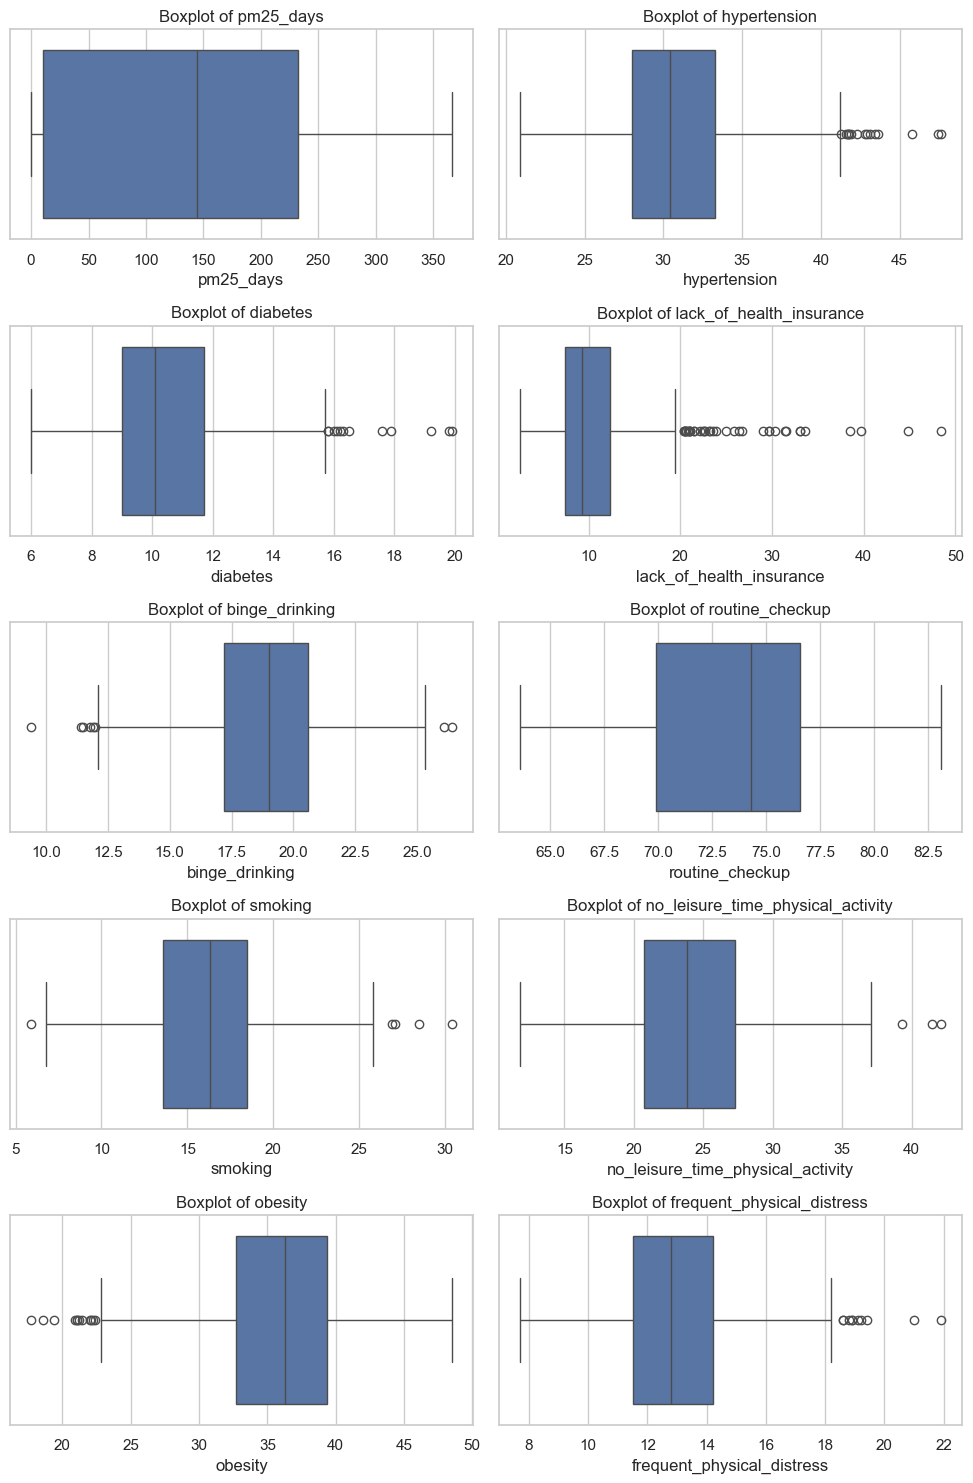

In [34]:
fig, axes = plt.subplots(5, 2, figsize=(10, 15))
for col in variables_of_interest:
    ax = axes.flatten()[variables_of_interest.index(col)]
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


## 4. Bivariate Analysis: PM2.5 vs Disease Outcomes

This section examines pairwise relationships between PM2.5 exposure and each health outcome (diabetes and hypertension) to identify potential associations and the form of those associations.

We will use scatterplots with fitted regression lines to visually inspect linearity, clusters, and potential outliers.

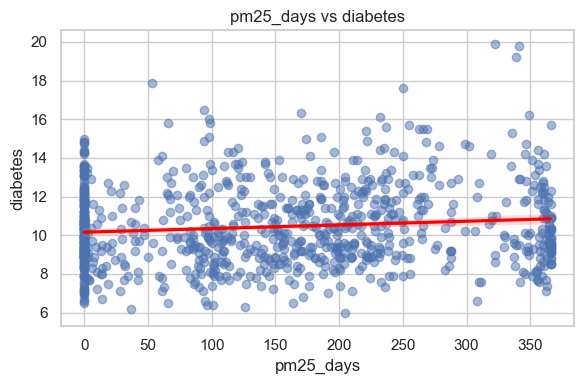

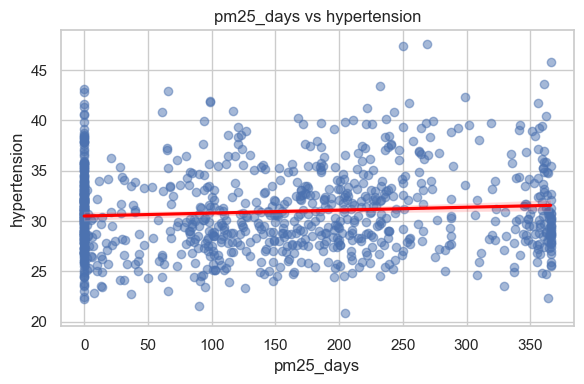

In [35]:
pairs = [
    ("pm25_days", "diabetes"),
    ("pm25_days", "hypertension")
]

for x, y in pairs:
    if x not in df.columns or y not in df.columns:
        continue
        
    plt.figure(figsize=(6, 4))
    sns.regplot(x=x, y=y, data=df, scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
    plt.title(f"{x} vs {y}")
    plt.tight_layout()
    plt.show()


### 5. Correlation Matrix

A correlation matrix summarizes pairwise linear relationships across the set of variables and helps identify strong associations and multicollinearity among predictors.

We compute Pearson correlations for continuous variables and display them in a heatmap for quick inspection. 

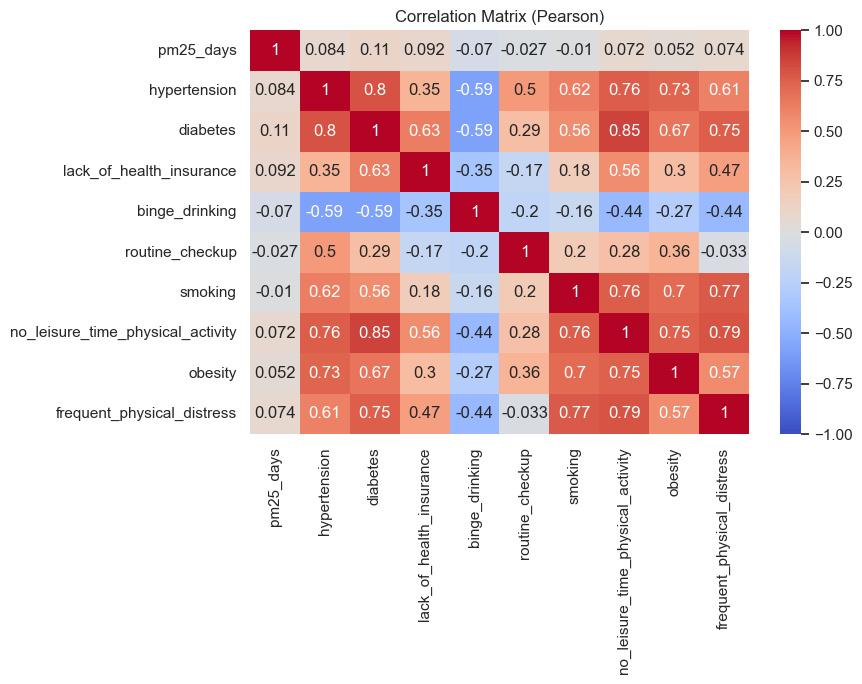

In [36]:
corr_mat = df[variables_of_interest].corr()

plt.figure(figsize=(9, 7))
sns.heatmap(corr_mat, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix (Pearson)")
plt.tight_layout()
plt.show()

### 6. Pairplot

A pairplot provides a compact visual summary of marginal distributions (diagonal) and pairwise scatterplots (off-diagonal) for a subset of variables. It is useful for simultaneously assessing distribution shapes, linear or non-linear relationships, and potential outliers or clusters.

<Figure size 3000x3000 with 0 Axes>

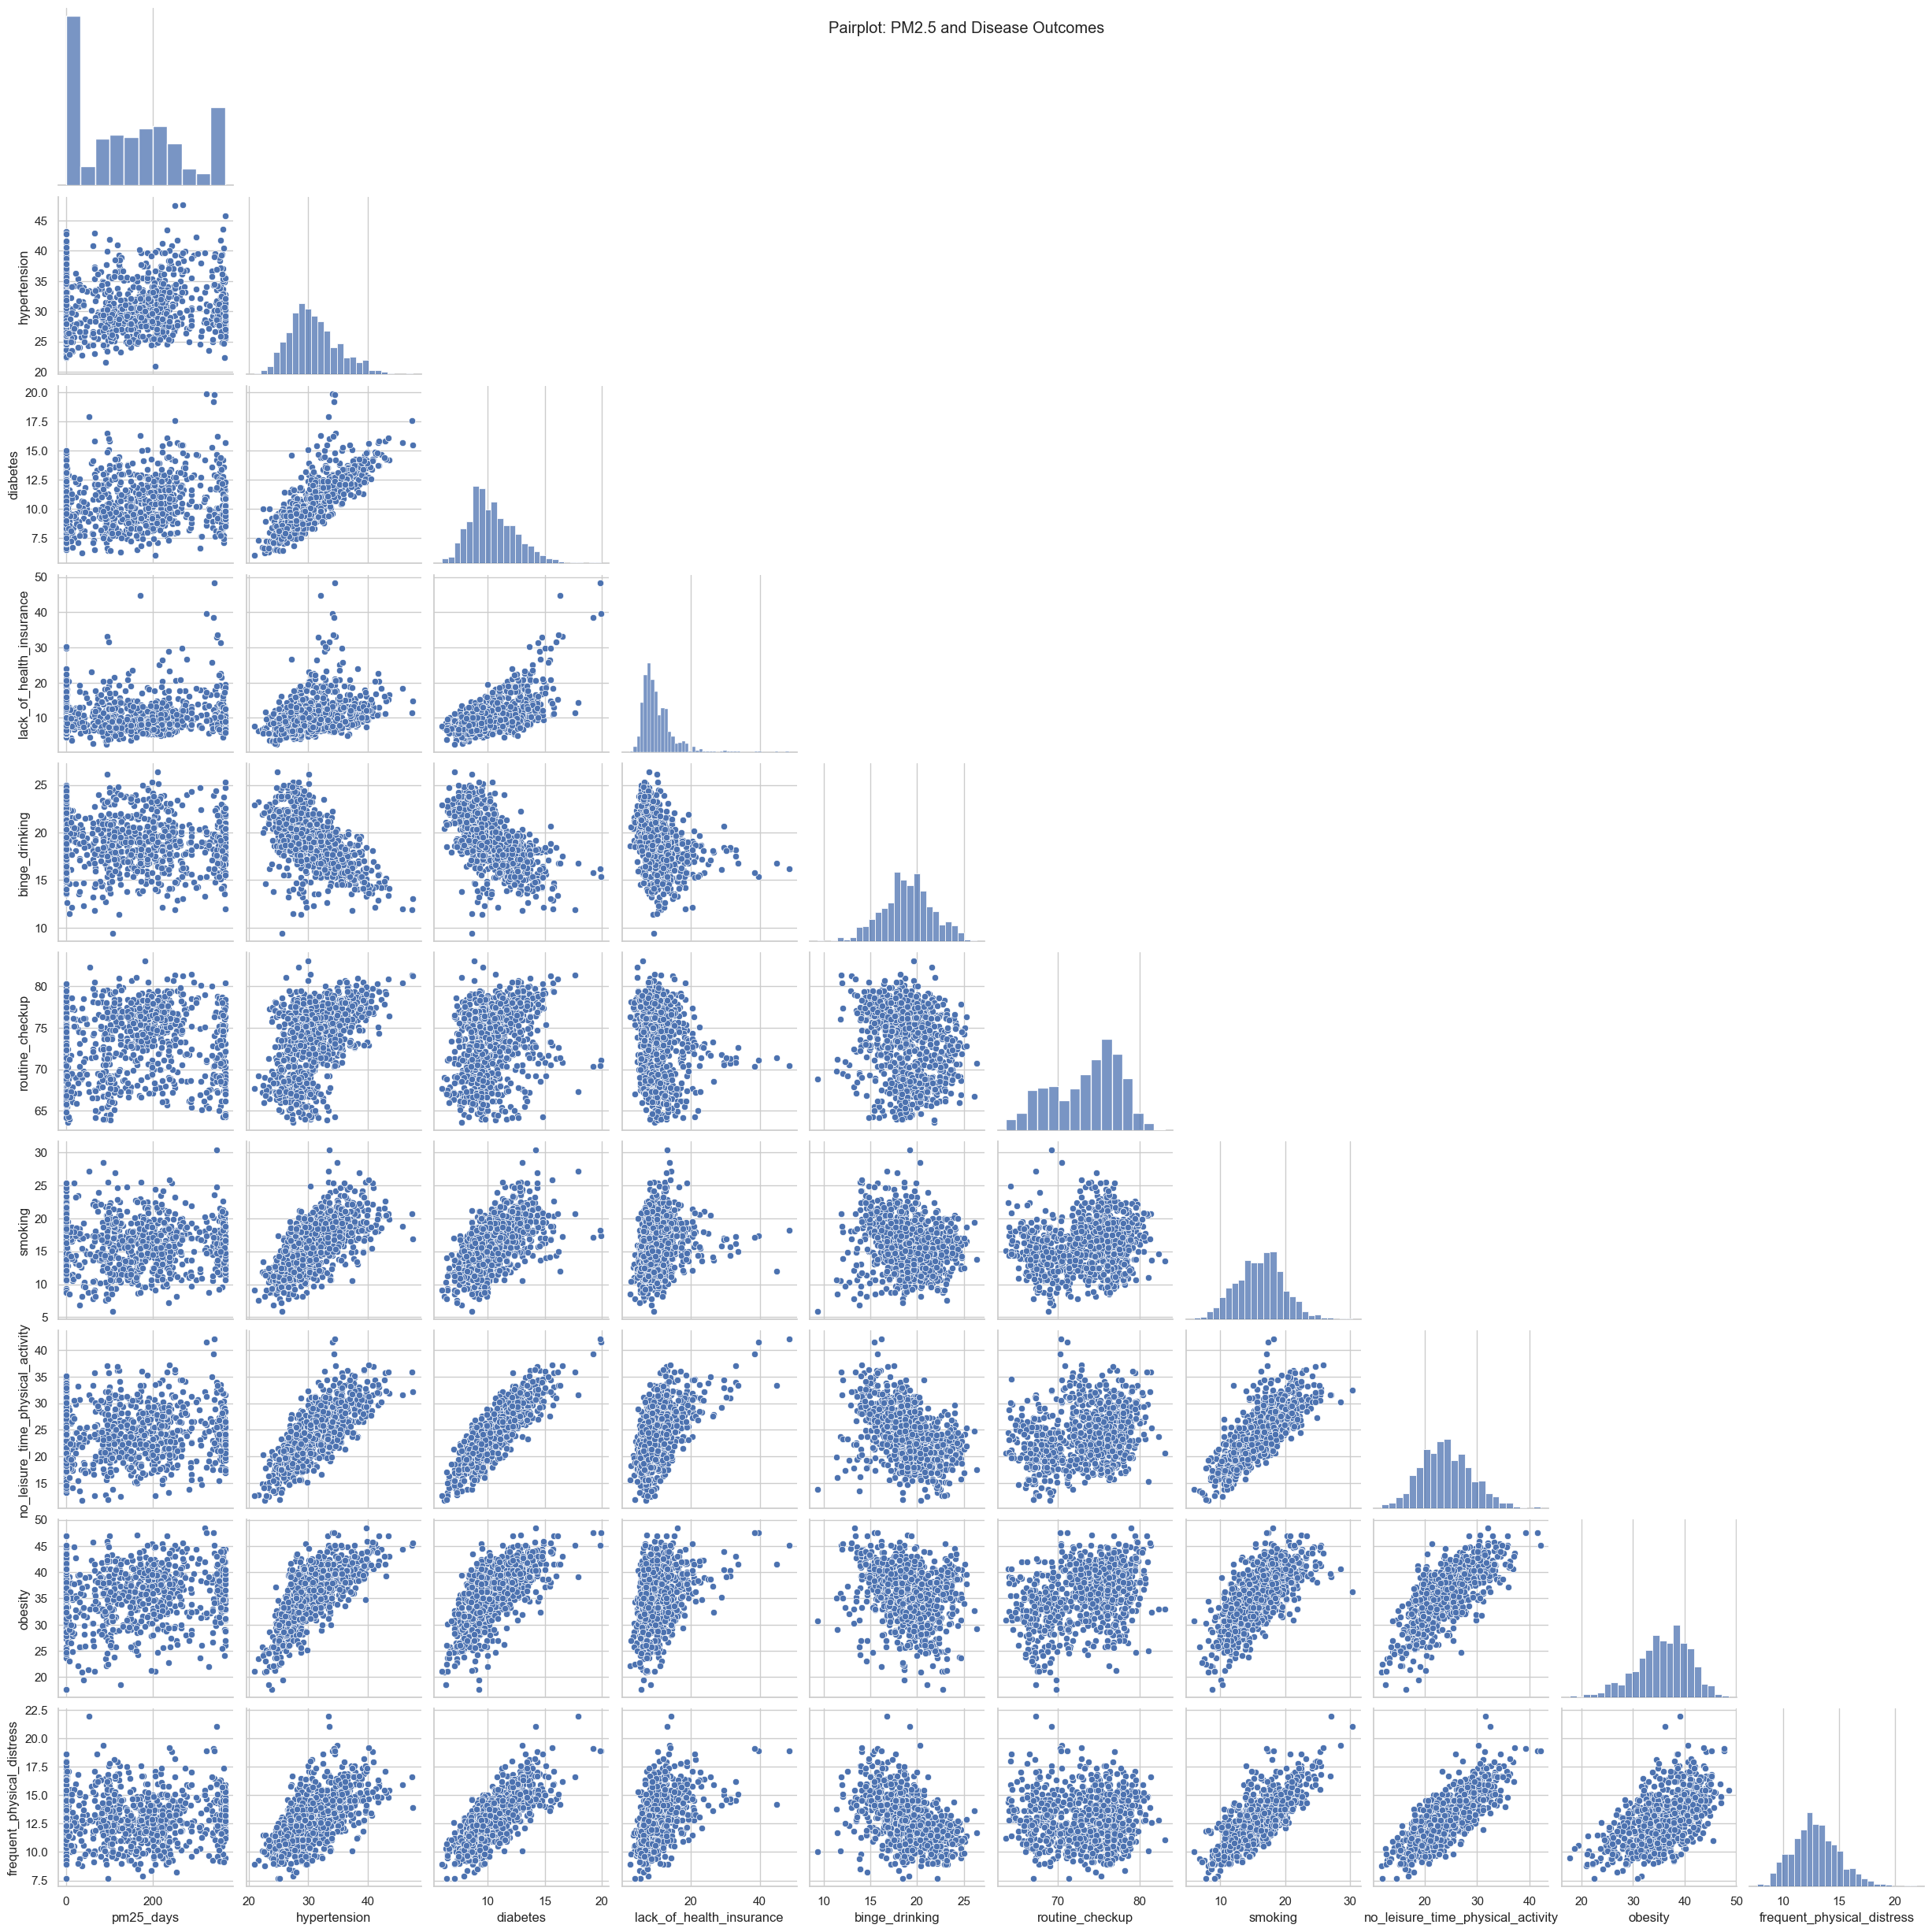

In [43]:
plt.figure(figsize=(30, 30))
sns.pairplot(df[variables_of_interest], corner=True)
plt.suptitle("Pairplot: PM2.5 and Disease Outcomes")
plt.show()